# Data Preprocessing - Parte 3 (Temporal Data)

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def load_data(file_path, sep=',', encoding='utf-8'):
    """Load data from a CSV file into a pandas DataFrame."""
    try:
        data = pd.read_csv(file_path, sep=sep, encoding=encoding)
        print("Data loaded successfully.")
        return data
    except Exception as e:
        print(f"An error occurred while loading the data: {e}")
        return None

def summarize_data(data):
    """Generate summary statistics of the DataFrame."""
    if data is not None:
        summary = data.describe()
        print("Data summary:")
        print(summary)
        return summary
    else:
        print("No data to summarize.")
        return None

In [59]:
data = load_data('../data/section_3/afg_health_expenditure_cleaned.csv')
data.head()

Data loaded successfully.


,Year,Budget Classification,COFOG1,COFOG2,COFOG3,Major Code,Sub-Major Code,Sector,Expenditure,Gregorian Year
0,1389,4 Liabilities,Not Identified,Not Identified,Not Identified,41 Current Liabilities,412 Accounts Payable - Others,Agriculture and Rural Development,0.0,2010
1,1389,1 Revenue,Not Identified,Not Identified,Not Identified,14 Miscellaneous Revenue,140 Other revenue,Infrastructure and Natural Resources,0.0,2010
2,1389,2 Expenditure,Not Identified,Not Identified,Not Identified,22 Use of Goods and Services,221 Travel,"Governance, Rule of Law and Human Rights",3.0,2010
3,1389,2 Expenditure,04 Economic affairs,"04.2 Agriculture, forestry, fishing and hunting",04.2.1 Agriculture,21 Wages and Salaries Expenditure,211 Wages and Salaries in Cash,Infrastructure and Natural Resources,3.0,2010
4,1389,2 Expenditure,01 General public services,"01.1 Executive and legislative organs, financi...",01.1.2 Financial and fiscal Affairs,21 Wages and Salaries Expenditure,211 Wages and Salaries in Cash,Economic Governance and Private Sector Develop...,8.0,2010


In [ ]:
# Dropping columns ...

## Part 2

In [3]:
data = load_data("../data/section_3/indicators_afg.csv")
summary = summarize_data(data)

Data loaded successfully.
Data summary:
       Country Name Country ISO3   Year Indicator Name Indicator Code  Value
count         59730        59730  59730          59730          59730  59730
unique            2            2     66           3317           3318  34557
top     Afghanistan          AFG   2007  Net migration    SM.POP.NETM      0
freq          59729        59729   2330            195            195   3358


In [4]:
data.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Afghanistan,AFG,2023,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,324.290280127844
2,Afghanistan,AFG,2022,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,248.022811305383
3,Afghanistan,AFG,2021,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,255.25474713292
4,Afghanistan,AFG,2020,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,427.561571724008


In [5]:
# dropping the first row
# data = data.drop(index=0)
data.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Afghanistan,AFG,2023,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,324.290280127844
2,Afghanistan,AFG,2022,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,248.022811305383
3,Afghanistan,AFG,2021,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,255.25474713292
4,Afghanistan,AFG,2020,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,427.561571724008


In [6]:
# Transforming the 'Year' column to numeric type and 'Value' column to float type
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')  # integer type
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')  # float type

In [7]:
# Keeping the rows with 'Indicator Name' == 'Military expenditure (% of general government expenditure)'
data_military_expenditure = data[data['Indicator Name'] == 'Military expenditure (% of general government expenditure)']
data_military_expenditure.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
45674,Afghanistan,AFG,2021.0,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,10.502660
45675,Afghanistan,AFG,2020.0,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,4.972825
45676,Afghanistan,AFG,2019.0,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,4.275736
45677,Afghanistan,AFG,2018.0,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,3.724855
45678,Afghanistan,AFG,2017.0,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,3.652592


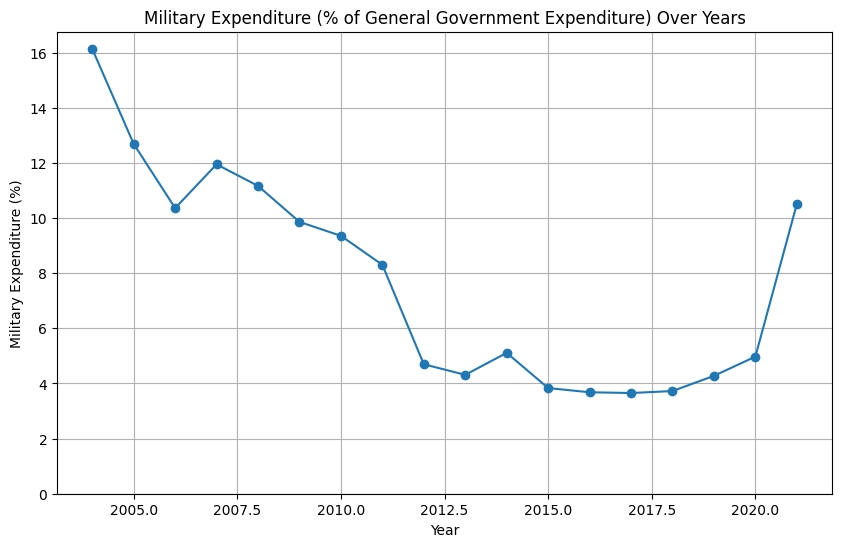

In [8]:
# Plotting line chart for Military Expenditure over the years using the columns 'Year' and 'Value'
# y-axis starting from 0
plt.figure(figsize=(10, 6))
plt.plot(data_military_expenditure['Year'], data_military_expenditure['Value'], marker='o')
plt.title('Military Expenditure (% of General Government Expenditure) Over Years')
plt.xlabel('Year')
plt.ylabel('Military Expenditure (%)')
plt.ylim(bottom=0)
plt.grid(True)
plt.show()

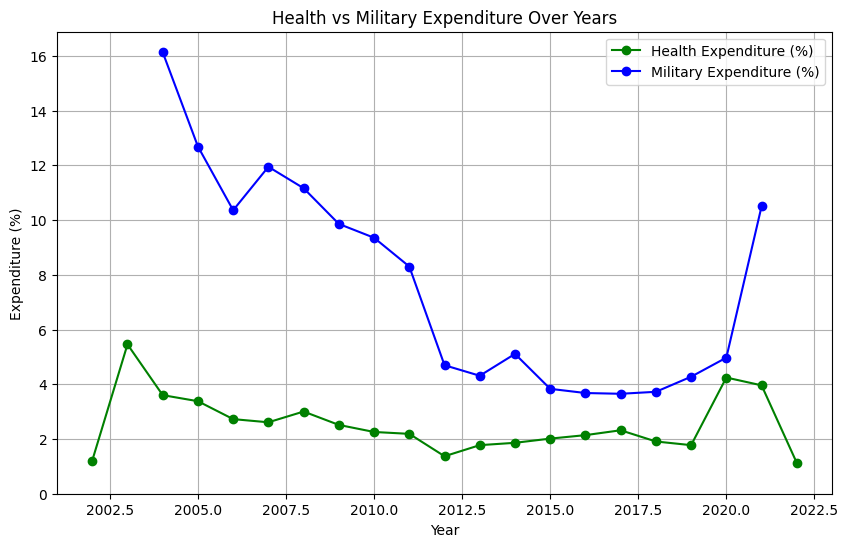

In [9]:
# Plotting two lines: 'Domestic general government health expenditure (% of general government expenditure)' and 'Military expenditure (% of general government expenditure)'
data_health_expenditure = data[data['Indicator Name'] == 'Domestic general government health expenditure (% of general government expenditure)']
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data_health_expenditure['Year'], data_health_expenditure['Value'], marker='o', label='Health Expenditure (%)', color='green')
ax.plot(data_military_expenditure['Year'], data_military_expenditure['Value'], marker='o', label='Military Expenditure (%)', color='blue')
ax.set_title('Health vs Military Expenditure Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Expenditure (%)')
ax.set_ylim(bottom=0)
ax.grid(True)
ax.legend()
plt.show()

In [10]:
# Printing in a file all the unique values of the column 'Indicator Name'
"""
unique_indicators = data['Indicator Name'].unique()
with open('unique_indicators.txt', 'w') as f:
    for indicator in unique_indicators:
        f.write(f"{indicator}\n")
"""


'\nunique_indicators = data[\'Indicator Name\'].unique()\nwith open(\'unique_indicators.txt\', \'w\') as f:\n    for indicator in unique_indicators:\n        f.write(f"{indicator}\n")\n'

In [11]:
# Selecting only the unique indicators that contain the phrase '(% of GDP)'
"""
gdp_indicators = [indicator for indicator in unique_indicators if '(% of GDP)' in indicator]
print("Indicators related to GDP:")
for indicator in gdp_indicators:
    print(indicator)

my_gdp_indicators = ['Current health expenditure (% of GDP)',
                     'Expense (% of GDP)', 
                     'Government expenditure on education, total (% of GDP)',
                     'Military expenditure (% of GDP)']
"""

'\ngdp_indicators = [indicator for indicator in unique_indicators if \'(% of GDP)\' in indicator]\nprint("Indicators related to GDP:")\nfor indicator in gdp_indicators:\n    print(indicator)\n\nmy_gdp_indicators = [\'Current health expenditure (% of GDP)\',\n                     \'Expense (% of GDP)\', \n                     \'Government expenditure on education, total (% of GDP)\',\n                     \'Military expenditure (% of GDP)\']\n'

In [12]:
# Grouping by year and summing the 'Value' for each year in the gdp_indicators
"""
gdp_data = data[data['Indicator Name'].isin(my_gdp_indicators)]
gdp_summary = gdp_data.groupby('Year')['Value'].sum().reset_index()
print("GDP-related indicators summary by year:")
print(gdp_summary)
"""

'\ngdp_data = data[data[\'Indicator Name\'].isin(my_gdp_indicators)]\ngdp_summary = gdp_data.groupby(\'Year\')[\'Value\'].sum().reset_index()\nprint("GDP-related indicators summary by year:")\nprint(gdp_summary)\n'

In [13]:
#categories = ['Current health expenditure (% of GDP)', 'Domestic general government health expenditure (% of GDP)',]

# Domestic general government health expenditure (% of general government expenditure)

In [14]:
# line plot with all the gdp indicators in my_gdp_indicators
"""
plt.figure(figsize=(12, 8))
for indicator in my_gdp_indicators:
    indicator_data = data[data['Indicator Name'] == indicator]
    plt.plot(indicator_data['Year'], indicator_data['Value'], label=indicator)

plt.xlabel('Year')
plt.ylabel('Value (% of GDP)')
plt.title('GDP-related Indicators Over Time')
plt.legend()
plt.show()
"""

"\nplt.figure(figsize=(12, 8))\nfor indicator in my_gdp_indicators:\n    indicator_data = data[data['Indicator Name'] == indicator]\n    plt.plot(indicator_data['Year'], indicator_data['Value'], label=indicator)\n\nplt.xlabel('Year')\nplt.ylabel('Value (% of GDP)')\nplt.title('GDP-related Indicators Over Time')\nplt.legend()\nplt.show()\n"

In [15]:
# https://blogs.worldbank.org/en/endpovertyinsouthasia/where-does-money-go-examining-public-spending-afghanistan

### Prove con un altro dataset

In [16]:
data = load_data("../data/section_3/afg-boost-eng-2011-19.CSV", sep=';', encoding='ansi')
summary = summarize_data(data)

C:\Users\HEW14SDQ1006NL\AppData\Local\Temp\ipykernel_17028\3226375730.py:4: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=sep, encoding=encoding)


Data loaded successfully.
Data summary:
                Year
count  829828.000000
mean     1393.812727
std         2.842847
min      1389.000000
25%      1391.000000
50%      1394.000000
75%      1396.000000
max      1398.000000


In [17]:
data.head()

,Year,Budget Classification,Recurrent/Development,Ministry/Agency,Sub-Org,Unit,Project,Province,District,Program,...,Sub-Major Code,Object Code,Fund Type,Fund,Sub Fund,Fund Component,Sector,Budget,Expenditure,Commitment/Obligation
0,1389,1 Revenue,1 Recurrent,20 Ministry of Finance,2000 Ministry of Finanace,20000 Ministry of Finanace,999999 Unknown,90 Central Ministries,9000 Central Ministries,999 Balance Sheet Account,...,191 Grants Foreign governments,19100 Current grant foreign government,1 General Fund,10 RECURRENT BUDGET,1000 Recurrent Operating,10002 Lotfa,Economic Governance and Private Sector Develop...,-,(24.403.574.911),-
1,1389,1 Revenue,1 Recurrent,20 Ministry of Finance,2000 Ministry of Finanace,20000 Ministry of Finanace,999999 Unknown,90 Central Ministries,9000 Central Ministries,999 Balance Sheet Account,...,191 Grants Foreign governments,19100 Current grant foreign government,1 General Fund,10 RECURRENT BUDGET,1000 Recurrent Operating,10001 ARTF,Economic Governance and Private Sector Develop...,-,(15.444.749.259),-
2,1389,1 Revenue,1 Recurrent,20 Ministry of Finance,2000 Ministry of Finanace,20000 Ministry of Finanace,999999 Unknown,90 Central Ministries,9000 Central Ministries,999 Balance Sheet Account,...,191 Grants Foreign governments,19100 Current grant foreign government,1 General Fund,10 RECURRENT BUDGET,1000 Recurrent Operating,10004 Cstc - Mod,Economic Governance and Private Sector Develop...,-,(13.507.149.151),-
3,1389,1 Revenue,1 Recurrent,20 Ministry of Finance,2008 Unknown,20080 Customs,999999 Unknown,32 Herat,3201 Provincial Capital Of Herat (Herat),999 Balance Sheet Account,...,120 Customs Duty and taxes imports,12000 Customs duty imports,1 General Fund,10 RECURRENT BUDGET,1000 Recurrent Operating,10000 Operating Fund,Economic Governance and Private Sector Develop...,-,(7.761.472.226),-
4,1389,1 Revenue,1 Recurrent,20 Ministry of Finance,2008 Unknown,20080 Customs,999999 Unknown,06 Nangarhar,0601 Provincial Capital Of Nangarhar ( Jalala...,999 Balance Sheet Account,...,120 Customs Duty and taxes imports,12000 Customs duty imports,1 General Fund,10 RECURRENT BUDGET,1000 Recurrent Operating,10000 Operating Fund,Economic Governance and Private Sector Develop...,-,(6.099.675.567),-


In [18]:
data[' Expenditure '] # Just for comparison

0          (24.403.574.911)
1          (15.444.749.259)
2          (13.507.149.151)
3           (7.761.472.226)
4           (6.099.675.567)
                ...        
829823      32.275.765.182 
829824     (31.341.780.900)
829825        (906.085.000)
829826            (447.422)
829827         (27.451.860)
Name:  Expenditure , Length: 829828, dtype: object

In [19]:
# Printing the column names and some statistics and their types
    
#print(data.columns)
#print(data.describe())
print(data.dtypes)

Year                        int64
Budget Classification      object
Recurrent/Development      object
Ministry/Agency            object
Sub-Org                    object
Unit                       object
Project                    object
Province                   object
District                   object
Program                    object
Sub-Program                object
Activity                   object
COFOG1                     object
COFOG2                     object
COFOG3                     object
Major Code                 object
Sub-Major Code             object
Object Code                object
Fund Type                  object
Fund                       object
Sub Fund                   object
Fund Component             object
Sector                     object
 Budget                    object
 Expenditure               object
 Commitment/Obligation     object
dtype: object


In [20]:
# Showing the values of the column 'COFOG1'
from numpy import sort


print(sort(data['COFOG1'].unique()))

['01 General public services' '02 Defence' '03 Public order and safety'
 '04 Economic affairs' '05 Environmental protection'
 '06 Housing and community amenities' '07 Health'
 '08 Recreation, culture and religion' '09 Education'
 '10 Social Protection' 'Not Identified']


In [21]:
data['COFOG1'].value_counts().sort_index()

COFOG1
01 General public services             103435
02 Defence                              23150
03 Public order and safety              99607
04 Economic affairs                    178435
05 Environmental protection              8082
06 Housing and community amenities      11949
07 Health                               40298
08 Recreation, culture and religion     46322
09 Education                           158640
10 Social Protection                    31817
Not Identified                         128093
Name: count, dtype: int64

Checking each column one by one

In [22]:
#health_data['Budget Classification'].value_counts().sort_index() # Taking just the 'Expenditure' rows

In [23]:
data['Recurrent/Development'].value_counts().sort_index() # Not intereseting - to be dropped
data_processed = data.drop(columns=['Recurrent/Development'])

In [24]:
data_processed['Ministry/Agency'].value_counts().sort_index() # Not interesting - to be dropped
data_processed = data_processed.drop(columns=['Ministry/Agency'])

In [25]:
data_processed['Sub-Org'].value_counts().sort_index() # Not interesting - to be dropped
data_processed = data_processed.drop(columns=['Sub-Org'])

In [26]:
data['Unit'].value_counts().sort_index() # Not interesting - to be dropped
data_processed = data_processed.drop(columns=['Unit'])

In [27]:
data['Project'].value_counts().sort_index() # Not interesting - to be dropped
data_processed = data_processed.drop(columns=['Project'])

In [28]:
data['Province'].value_counts().sort_index() # Not interesting - to be dropped
data_processed = data_processed.drop(columns=['Province'])

In [29]:
data['District'].value_counts().sort_index() # Not interesting - to be dropped
data_processed = data_processed.drop(columns=['District'])

In [30]:
data['Program'].value_counts().sort_index() # Not interesting - to be dropped
data_processed = data_processed.drop(columns=['Program'])

In [31]:
data['Sub-Program'].value_counts().sort_index() # Not interesting - to be dropped
data_processed = data_processed.drop(columns=['Sub-Program'])

In [32]:
data['Activity'].value_counts().sort_index() # Not interesting - to be dropped
data_processed = data_processed.drop(columns=['Activity'])

In [33]:
data['COFOG2'].value_counts().sort_index() # Not interesting - For now we keep it

COFOG2
01.1 Executive and legislative organs, financial and fiscal affairs, external affairs     79146
01.3 General services                                                                     16199
01.4 Basic research                                                                         671
01.6 General public services n.e.c.                                                        7419
02.1 Military defence                                                                     21668
02.5 Defence n.e.c.                                                                        1482
03.1 Police services                                                                      38475
03.2 Fire-protection services                                                              6521
03.3 Law courts                                                                           53899
03.4 Prisons                                                                                712
04.1 General economic, commercial

In [34]:
data['COFOG3'].value_counts().sort_index() # Not interesting - For now we keep it

COFOG3
01.1.1 Executive and Legislative Organs              49744
01.1.2 Financial and fiscal Affairs                  25971
01.1.3 External affairs                               3431
01.3.1 General Personnel Services                     8022
01.3.2 Overall Planning and Statistical Services      6834
                                                     ...  
10.5.0 Unemployment                                     76
10.7.0 Social Exclusion N.E.C.                        2428
10.8.0 R&D Social Protection                           179
10.9.0 Social protection n.e.c.                      26607
Not Identified                                      128093
Name: count, Length: 75, dtype: int64

In [35]:
data['Major Code'].value_counts().sort_index() # To be checked - keeping for now

Major Code
10 Unknown                                306
11 TAX REVENUE                           1498
11 Tax Revenue                           6873
12 CUSTOMS DUTY AND TAXES IMPORTS         231
12 Customs Duty and Fees                  727
13 NON TAX REVENUE                       3993
13 Non Tax Revenue                      14512
14 Miscellaneous Revenue                 2840
14 OTHER REVENUE                          874
15 SALE OF GOVERNMENT PROPERTY             50
15 Sale of Non-Current Assets             174
17 SOCIAL CONTRIBUTIONS                   122
17 Social Contributions                   520
18 LOANS                                    4
18 Loans                                    1
19 GRANTS                                 120
19 Grants                               52410
21 WAGES AND SALARIES EXPENDITURE       68553
21 Wages and Salaries Expenditure      259463
22 USE OF GOODS AND SERVICES            67813
22 Use of Goods and Services           256090
23 INTEREST & REPAYMENT

In [36]:
data['Sub-Major Code'].value_counts().sort_index() # keeping for now

Sub-Major Code
101                                     121
102                                      67
103                                       3
104                                      43
105                                      26
                                      ...  
421 Other Liabilities                 14523
422 Foreign Currency Gain and Loss       30
423 Commitments                          46
443 Loans - foreign                       3
511 Retained Earnings                     6
Name: count, Length: 90, dtype: int64

In [37]:
data['Object Code'].value_counts().sort_index() # Not interesting - to be dropped
data_processed = data_processed.drop(columns=['Object Code'])

In [38]:
data['Fund Type'].value_counts().sort_index() # To be checked (also all should be title case) - To be dropped
data_processed = data_processed.drop(columns=['Fund Type'])

In [39]:
data['Fund'].value_counts().sort_index() # Not interesting - to be dropped
data_processed = data_processed.drop(columns=['Fund'])

In [40]:
data['Sub Fund'].value_counts().sort_index() # Not interesting - to be dropped
data_processed = data_processed.drop(columns=['Sub Fund'])

In [41]:
data['Fund Component'].value_counts().sort_index() # Not interesting - to be dropped
data_processed = data_processed.drop(columns=['Fund Component'])

In [42]:
data['Sector'].value_counts().sort_index() # To be checked. Maybe keeping just the 'Health' sector

Sector
Agriculture and Rural Development                     104013
Economic Governance and Private Sector Development     79055
Education                                             195347
Governance, Rule of Law and Human Rights              158656
Health                                                 36866
Infrastructure and Natural Resources                  110873
Not Mapped                                              1947
Security                                               80763
Social Protection                                      62308
Name: count, dtype: int64

In [43]:
# What are all the possible values of the 'Sector' column? Vs the values in the COFOG1 column
print(sort(data_processed['Sector'].unique()))
print(sort(data_processed['COFOG1'].unique()))

['Agriculture and Rural Development'
 'Economic Governance and Private Sector Development' 'Education'
 'Governance, Rule of Law and Human Rights' 'Health'
 'Infrastructure and Natural Resources' 'Not Mapped' 'Security'
 'Social Protection']
['01 General public services' '02 Defence' '03 Public order and safety'
 '04 Economic affairs' '05 Environmental protection'
 '06 Housing and community amenities' '07 Health'
 '08 Recreation, culture and religion' '09 Education'
 '10 Social Protection' 'Not Identified']


In [44]:
data_processed = data_processed.rename(columns=lambda x: x.strip())
data_processed['Budget'].value_counts().sort_index() # Dropping it
data_processed = data_processed.drop(columns=['Budget'])

In [45]:
# Making another dataset (data_exp) in order to verify if something went wrong
data_exp = data_processed.copy()

# Cleaning the 'Expenditure' column: keeping only values that are strings representing positive numbers (no - no (numbers in parentheses))
data_exp['Expenditure'].value_counts()  # To be cleaned as well
data_exp = data_exp[~data_exp['Expenditure'].str.contains('-', na=False)]
data_exp = data_exp[~data_exp['Expenditure'].str.contains('[()]', regex=True, na=False)]

# Removing the dots with regex
data_exp['Expenditure'] = data_exp['Expenditure'].str.replace('.', '', regex=False)
data_exp['Expenditure'].value_counts()

Expenditure
30000           2975
20000           2373
10000           2358
50000           2212
5000            1909
                ... 
18824448           1
19382659           1
4819839            1
3354667            1
32275765182        1
Name: count, Length: 299861, dtype: int64

In [46]:
data_processed['Expenditure'].value_counts()  # Just for comparison

Expenditure
-               63168
30.000           2975
20.000           2373
10.000           2358
50.000           2212
                ...  
26.113.999          1
53.939.353          1
26.007.540          1
51.893              1
(27.451.860)        1
Name: count, Length: 388827, dtype: int64

In [47]:
# dropping it
data_exp = data_exp.drop(columns=['Commitment/Obligation'])

In [48]:
# Adding a column for the gregorian calendar year (+621 to the 'Year' column)
data_exp['Gregorian Year'] = data_exp['Year'] + 621

In [49]:
# Printing the row 4194
data.iloc[4196]

Year                                                                    1389
Budget Classification                                          2 Expenditure
Recurrent/Development                                            1 Recurrent
Ministry/Agency             10 Office of the Chief of staff to the president
Sub-Org                    1000 Office of the Chief of staff to the presi...
Unit                       10000 Office of the Chief of staff to the pres...
Project                              000000 Project code for Oprating Budget
Province                                               90 Central Ministries
District                                             9000 Central Ministries
Program                               101 Service Deleivery to the president
Sub-Program                          1011 Service Deleivery to the president
Activity                             10111 Policy Monitoring and Evaluation 
COFOG1                                                        Not Identified

In [50]:
data_exp.head()

,Year,Budget Classification,COFOG1,COFOG2,COFOG3,Major Code,Sub-Major Code,Sector,Expenditure,Gregorian Year
4194,1389,4 Liabilities,Not Identified,Not Identified,Not Identified,41 Current Liabilities,412 Accounts Payable - Others,Agriculture and Rural Development,0,2010
4195,1389,1 Revenue,Not Identified,Not Identified,Not Identified,14 Miscellaneous Revenue,140 Other revenue,Infrastructure and Natural Resources,0,2010
4196,1389,2 Expenditure,Not Identified,Not Identified,Not Identified,22 Use of Goods and Services,221 Travel,"Governance, Rule of Law and Human Rights",3,2010
4197,1389,2 Expenditure,04 Economic affairs,"04.2 Agriculture, forestry, fishing and hunting",04.2.1 Agriculture,21 Wages and Salaries Expenditure,211 Wages and Salaries in Cash,Infrastructure and Natural Resources,3,2010
4198,1389,2 Expenditure,01 General public services,"01.1 Executive and legislative organs, financi...",01.1.2 Financial and fiscal Affairs,21 Wages and Salaries Expenditure,211 Wages and Salaries in Cash,Economic Governance and Private Sector Develop...,8,2010


In [51]:
data_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669758 entries, 4194 to 829823
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Year                   669758 non-null  int64 
 1   Budget Classification  669758 non-null  object
 2   COFOG1                 669758 non-null  object
 3   COFOG2                 669758 non-null  object
 4   COFOG3                 669758 non-null  object
 5   Major Code             669758 non-null  object
 6   Sub-Major Code         669758 non-null  object
 7   Sector                 669758 non-null  object
 8   Expenditure            636990 non-null  object
 9   Gregorian Year         669758 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 56.2+ MB


In [52]:
data_exp['COFOG1'].unique()

array(['Not Identified', '04 Economic affairs',
       '01 General public services', '03 Public order and safety',
       '09 Education', '08 Recreation, culture and religion',
       '10 Social Protection', '06 Housing and community amenities',
       '07 Health', '05 Environmental protection', '02 Defence'],
      dtype=object)

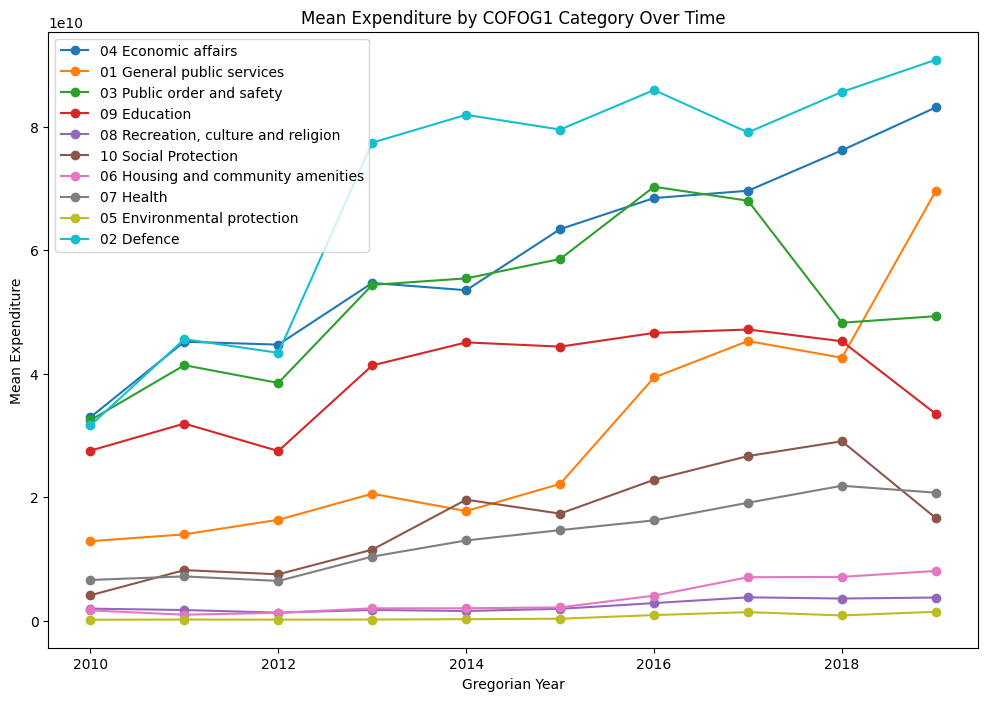

In [53]:
# Line chart: on the x-axis  the Gregorian Year, on the y-axis the Mean Expenditure, different lines for each COFOG1 category

data_final = data_exp.copy()
data_final['Expenditure'] = data_final['Expenditure'].astype(float)

fig, ax = plt.subplots(figsize=(12, 8))
for category in data_final['COFOG1'].unique():
    if category == 'Not Identified':
        continue
    category_data = data_final[data_final['COFOG1'] == category]
    mean_expenditure = category_data.groupby('Gregorian Year')['Expenditure'].sum().reset_index()
    ax.plot(mean_expenditure['Gregorian Year'], mean_expenditure['Expenditure'], marker='o', label=category)
ax.set_xlabel('Gregorian Year')
ax.set_ylabel('Mean Expenditure')
ax.set_title('Mean Expenditure by COFOG1 Category Over Time')
ax.legend()
plt.show()

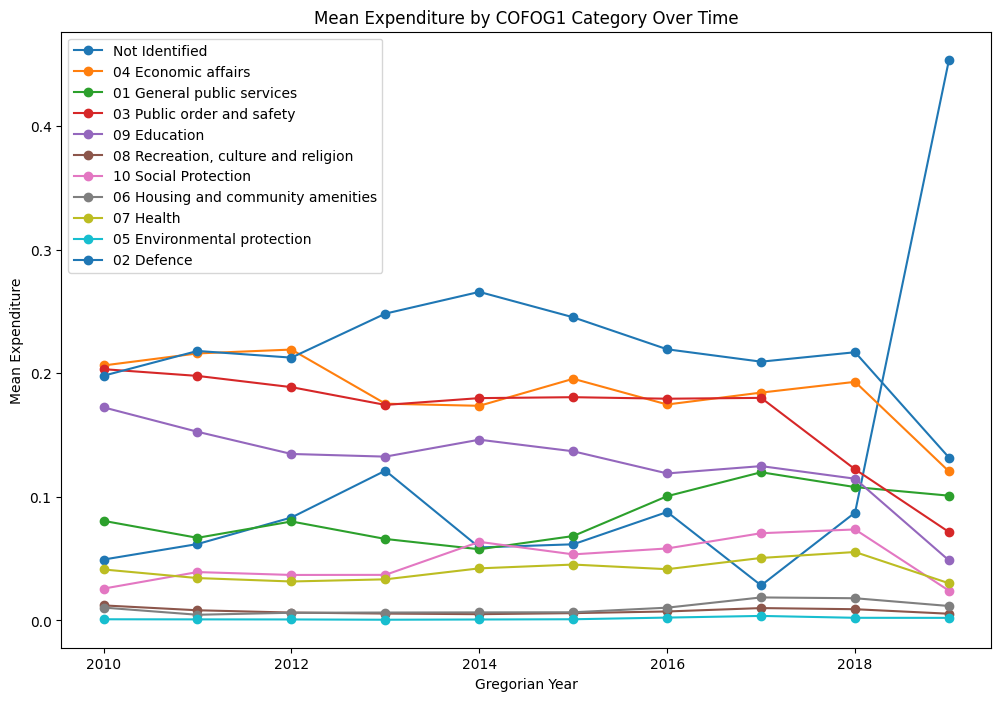

In [54]:
total_expenditure = data_final.groupby('Gregorian Year')['Expenditure'].sum()

fig, ax = plt.subplots(figsize=(12, 8))
for category in data_final['COFOG1'].unique():
    #if category == 'Not Identified':
    #    continue
    category_data = data_final[data_final['COFOG1'] == category]
    mean_expenditure = category_data.groupby('Gregorian Year')['Expenditure'].sum() / total_expenditure
    mean_expenditure = mean_expenditure.reset_index()
    ax.plot(mean_expenditure['Gregorian Year'], mean_expenditure['Expenditure'], marker='o', label=category)
ax.set_xlabel('Gregorian Year')
ax.set_ylabel('Mean Expenditure')
ax.set_title('Mean Expenditure by COFOG1 Category Over Time')
ax.legend()
plt.show()

In [ ]:
#Saving data_final to CSV
# data_final.to_csv("../data/section_3/afg_health_expenditure_cleaned.csv", index=False)